# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('bmh')

In [2]:
df = pd.read_csv('re_cleaned.csv')
df.head()

,Unnamed: 0,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_year,review_score
0,0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012.0,63
1,0,3,"New York City, not-too-distant-future: Eric Pa...",R,Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012.0,63
2,4,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,"Jun 18, 2002",$,41032915.0,82 minutes,Paramount Pictures,2002.0,46
3,5,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,"Oct 2, 2007",$,224114.0,123 minutes,Sony Pictures Classics,2006.0,64
4,6,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,"Nov 9, 2010",$,134904.0,117 minutes,NaN,2010.0,14


In [3]:
df = df.drop(['Unnamed: 0', "id"], axis = 1)
df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_year,review_score
0,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012.0,63
1,"New York City, not-too-distant-future: Eric Pa...",R,Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012.0,63
2,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,"Jun 18, 2002",$,41032915.0,82 minutes,Paramount Pictures,2002.0,46
3,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,"Oct 2, 2007",$,224114.0,123 minutes,Sony Pictures Classics,2006.0,64
4,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,"Nov 9, 2010",$,134904.0,117 minutes,NaN,2010.0,14


# Analysis

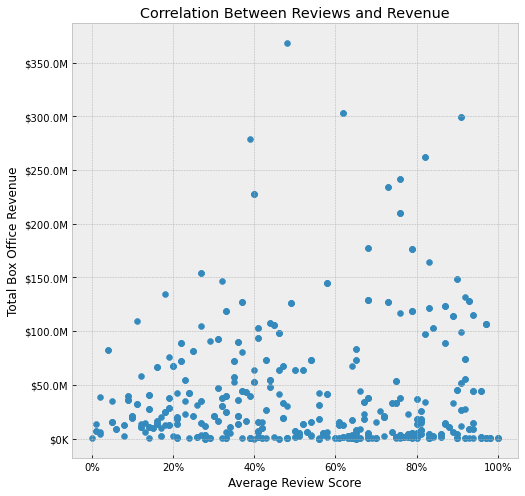

In [5]:
x = df["review_score"]
y = df["box_office"]
fig, ax = plt.subplots()

def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

ax.set_xlabel("Average Review Score")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Total Box Office Revenue")
ax.yaxis.set_major_formatter(currency)
ax.set_title("Correlation Between Reviews and Revenue")

plt.scatter(x,y);

plt.savefig("review_vs_revenue.png")

In [6]:
df2 = df.groupby("genre")[["box_office", "review_score"]].mean()
df2 = df2.astype(int)
df2 = df2.reset_index()
df2

,genre,box_office,review_score
0,Action and Adventure,61775219,51
1,Animation,56306894,53
2,Art House and International,2100204,73
3,Classics,6750000,28
4,Comedy,44528922,49
5,Documentary,8396810,77
6,Drama,28978972,57
7,Faith and Spirituality,5380785,30
8,Horror,29670609,39
9,Kids and Family,58241846,47


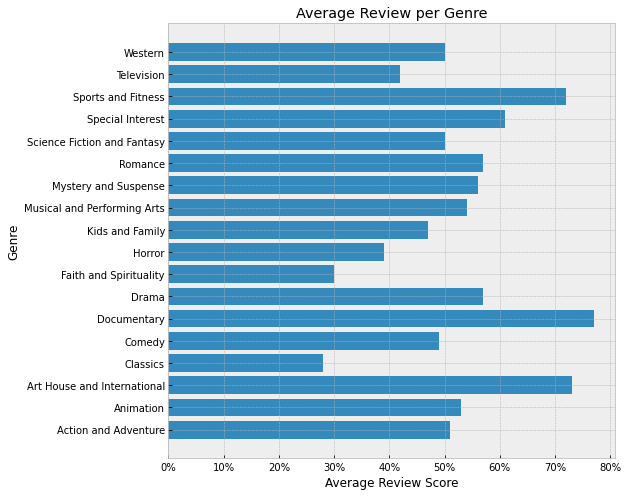

In [7]:
x2 = df2["genre"]
y2 = df2["box_office"]
z2 = df2["review_score"]
fig, ax = plt.subplots()

ax.set_xlabel("Average Review Score")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Genre")
ax.set_title("Average Review per Genre")
plt.barh(x2, z2);

plt.savefig("reviewscore_genre.png")

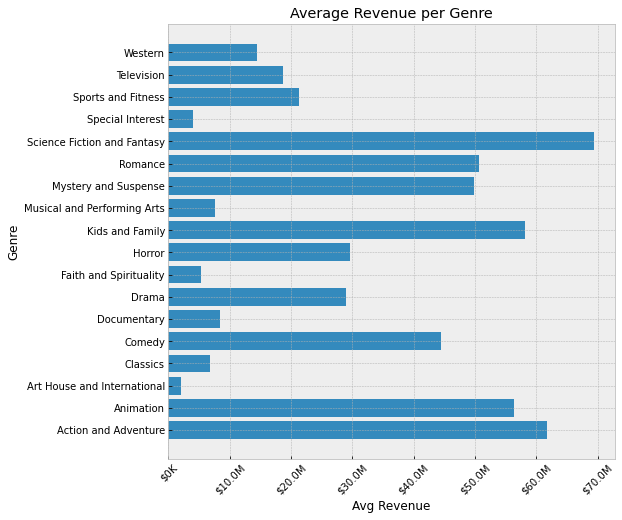

In [8]:
fig, ax = plt.subplots()

ax.set_xlabel("Avg Revenue")
ax.xaxis.set_major_formatter(currency)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylabel("Genre")
ax.set_title("Average Revenue per Genre")
plt.barh(x2, y2);

plt.savefig("revenue_genre.png")

In [9]:
df3 = df.groupby("rating").box_office.mean()
df3 = df3.astype(int)
df3 = df3.reset_index()
df3

,rating,box_office
0,G,34292554
1,NR,529878
2,PG,50565068
3,PG-13,59149135
4,R,23091547


In [10]:
df3 = df3.drop(1)
df3

,rating,box_office
0,G,34292554
2,PG,50565068
3,PG-13,59149135
4,R,23091547


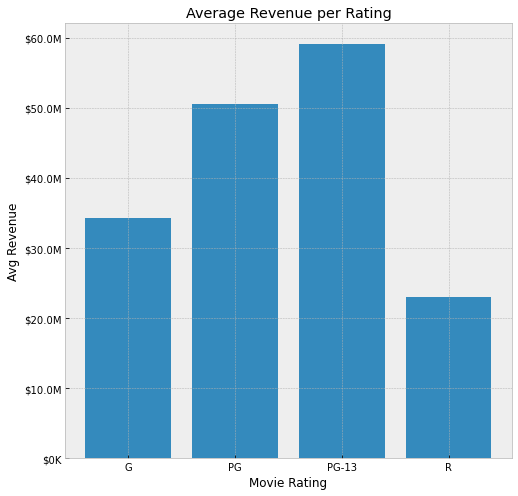

In [11]:
x3 = df3["rating"]
y3 = df3["box_office"]
fig, ax = plt.subplots()

ax.set_xlabel("Movie Rating")
ax.set_ylabel("Avg Revenue")
ax.yaxis.set_major_formatter(currency)
ax.set_title("Average Revenue per Rating")
plt.bar(x3, y3);

plt.savefig("revenue_rating.png")

In [12]:
df_science = df.loc[df["genre"] == 'Science Fiction and Fantasy']
df_science = df_science.sort_values(by = ["release_year"])

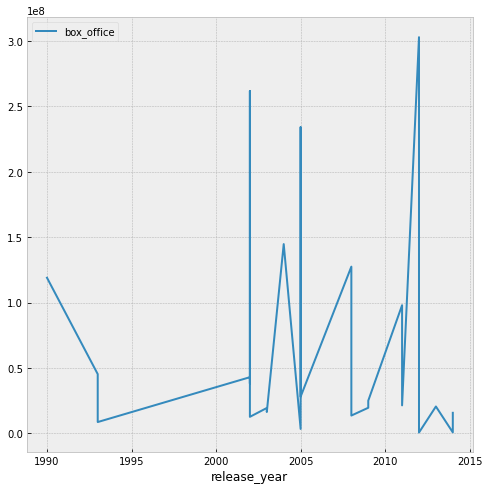

In [13]:
df_science.plot(x = "release_year", y = "box_office");